In [46]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform
import matplotlib.pyplot as plt
from invertiblewavelets import *
from scipy import signal

#### Load Example Data from Swarm A Spacecraft Magnetoemter

In [47]:
data = np.load("data.npy")

# Adding some noise
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array

#### Create Transform Object and Analysis Filters

In [53]:
# Initializing the Transform object automatically forms the analysis and synthesis filter bank during __init__
transform = Transform(
    data=data,
    fs = sample_rate,
    wavelet=Morlet(6,1),
    #pad_method='symmetric', # Padding method for the convolution calls np.pad. Set to None if no padding
    scales = 'linear',
    b = 2,
    q = 10,
    Mc = 5,
    dj = 1/12,
    lowpass_channel=True

)

#### Transform and Inverse the Data

Reconstruction error: 1.4408669812837617e-13


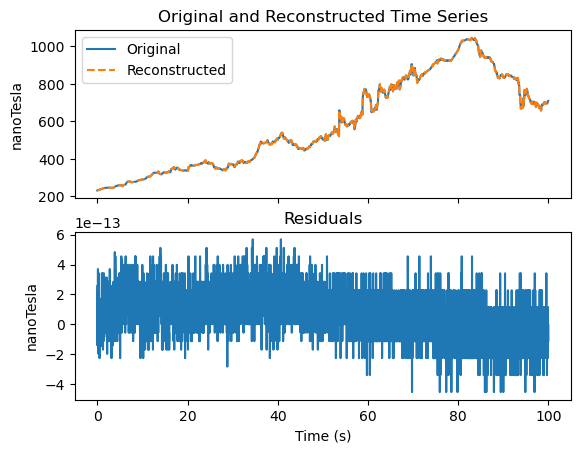

In [54]:
# Perform forward wavelet transform
coefficients = transform.forward(data)

# Perform inverse wavelet transform (reconstruction)
reconstructed = transform.inverse(coefficients)

# Calculate and print reconstruction error
reconstruction_error = np.mean(np.sqrt((reconstructed - data)**2))
print(f"Reconstruction error: {reconstruction_error}")

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, data, label='Original')
ax[0].plot(t, reconstructed, label='Reconstructed', linestyle='--')    
ax[0].set_ylabel('nanoTesla')
ax[0].legend()
ax[0].set_title('Original and Reconstructed Time Series')
ax[1].plot(t, data - reconstructed)
ax[1].set_title('Residuals')
ax[1].set_ylabel('nanoTesla')
ax[1].set_xlabel('Time (s)')
plt.show()

In [55]:
w_time = np.fft.ifft(transform.Wfreq, axis=-1)

In [56]:
delta_kl = w_time.conj() @ w_time.T

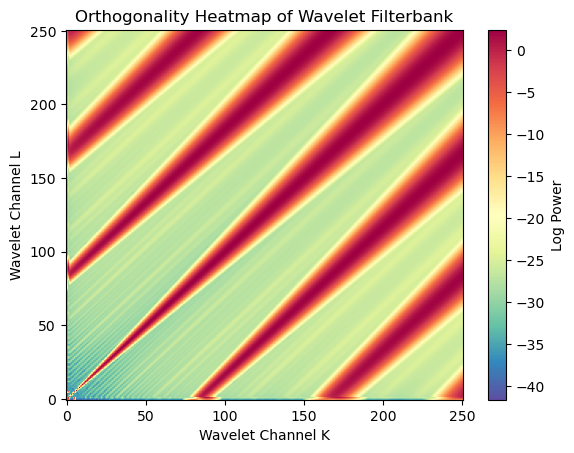

In [57]:
plt.imshow(np.log(np.abs(delta_kl)), aspect='auto', origin='lower', cmap='Spectral_r')
plt.title("Orthogonality Heatmap of Wavelet Filterbank")
plt.xlabel('Wavelet Channel K')
plt.ylabel('Wavelet Channel L')
cbar = plt.colorbar()
cbar.set_label('Log Power')

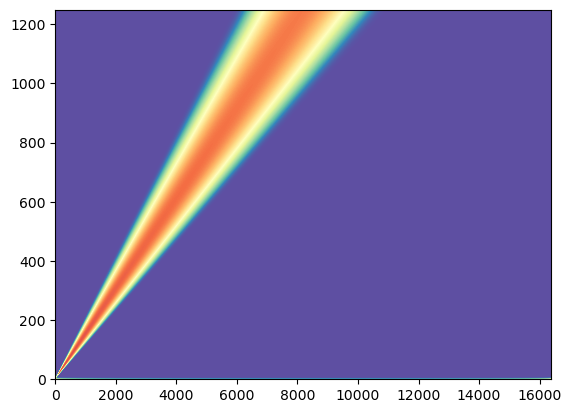

In [24]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(np.abs(transform.Wfreq)+1e-3), aspect='auto', origin='lower', cmap='Spectral_r')

